In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import sklearn
import xgboost as xgb

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
import os



In [55]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error,accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


In [56]:
df = pd.read_csv('https://raw.githubusercontent.com/boydo7/Telco-Churn/main/dataset')

# Dataset Description

| Feature Name	| Description |	
| :---        |    :----:   |  
| customerID |	Contains customer ID |	categorical
| gender |	whether the customer female or male |	categorical
| SeniorCitizen |	Whether the customer is a senior citizen or not (1, 0) |	numeric, int
| Partner |	Whether the customer has a partner or not (Yes, No) |	categorical
| Dependents |	Whether the customer has dependents or not (Yes, No) |	categorical
| tenure |	Number of months the customer has stayed with the company |	numeric, int
| PhoneService |	Whether the customer has a phone service or not (Yes, No) |	categorical
| MultipleLines |	Whether the customer has multiple lines r not (Yes, No, No phone service) |	categorical
| InternetService |	Customer’s internet service provider (DSL, Fiber optic, No) |	categorical
| OnlineSecurity |	Whether the customer has online security or not (Yes, No, No internet service) |	categorical
| OnlineBackup |	Whether the customer has online backup or not (Yes, No, No internet service) |	categorical
| DeviceProtection |	Whether the customer has device protection or not (Yes, No, No internet service) |	categorical
| TechSupport |	Whether the customer has tech support or not (Yes, No, No internet service) |	categorical
| streamingTV |	Whether the customer has streaming TV or not (Yes, No, No internet service) |	categorical
| streamingMovies |	Whether the customer has streaming movies or not (Yes, No, No internet service) |	categorical
| Contract |	The contract term of the customer (Month-to-month, One year, Two year) |	categorical
| PaperlessBilling |	Whether the customer has paperless billing or not (Yes, No) |	categorical
| PaymentMethod |	The customer’s payment method (Electronic check, Mailed check, Bank transfer, Credit card) |	categorical
| MonthlyCharges |	The amount charged to the customer monthly |	numeric , int
| TotalCharges |	The total amount charged to the customer |	object
| Churn |	Whether the customer churned or not (Yes or No) |	categorical

# Data Exploration

In [57]:
print('Dataset shape: ',df.shape)
df.head()

Dataset shape:  (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [58]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [60]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')  #converting series object dataset into numeric

df.TotalCharges.dtypes

dtype('float64')

In [61]:
missing_data = df.isnull().sum(axis=0).reset_index()  #checking missing value
missing_data.columns=['variable','missing values']
missing_data['filling factor %']=(df.shape[0]-missing_data['missing values'])/df.shape[0]*100
missing_data.sort_values('filling factor %').reset_index(drop = True)

,variable,missing values,filling factor %
0,TotalCharges,11,99.843817
1,customerID,0,100.000000
2,MonthlyCharges,0,100.000000
3,PaymentMethod,0,100.000000
4,PaperlessBilling,0,100.000000
5,Contract,0,100.000000
6,StreamingMovies,0,100.000000
7,StreamingTV,0,100.000000
8,TechSupport,0,100.000000
9,DeviceProtection,0,100.000000


# Visualize dataset

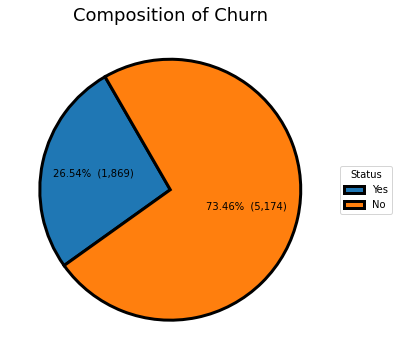

In [62]:
value_count=df.Churn.value_counts()

fig,ax=plt.subplots(figsize=(10, 6),subplot_kw=dict(aspect="equal"))
plt.title('Composition of Churn',fontsize=18)

data=[value_count[1],value_count[0]]

plt.pie(data,explode = (0,0),
        textprops=dict(size= 10, color= "black"),
        autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(data)/100),startangle = 120,wedgeprops=dict( edgecolor = "black", linewidth = 3))


labels='Yes','No'
plt.legend(labels,title='Status',loc='center',bbox_to_anchor=(1,0,0.2,1))

In [63]:
df=pd.get_dummies(df,columns=['Churn'],drop_first=True)

In [64]:
def stack_plot(data, xtick, col2='Churn_Yes', col3='total'):  #define for ditribution data
 ind = np.arange(data.shape[0])

 if len(data[xtick].unique())<5:
    plt.figure(figsize=(5,5))
 elif len(data[xtick].unique())>=5 & len(data[xtick].unique())<10:
    plt.figure(figsize=(7,7))
 else:
    plt.figure(figsize=(10,10))
    
 p1 = plt.bar(ind, data[col3].values)
 p2 = plt.bar(ind, data[col2].values)
 
 plt.ylabel('Count')

 plt.xticks(ticks=ind, rotation=90,labels= list(data[xtick].values))
 plt.legend((p1[0], p2[0]), ('Yes', 'Not Churn'))
 
 plt.show()

def barplots(data, col1, col2='Churn_Yes', top=False):
    temp = pd.DataFrame(df.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    temp['total'] = pd.DataFrame(df.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(df.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']

    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp)

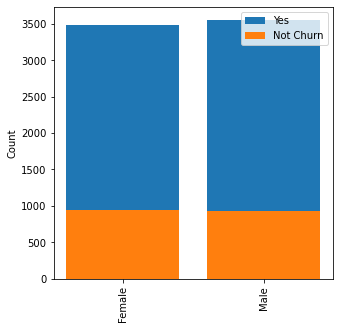

   gender  Churn_Yes  total       Avg
0  Female        939   3488  0.269209
1    Male        930   3555  0.261603


In [65]:
barplots(data,'gender','Churn_Yes')

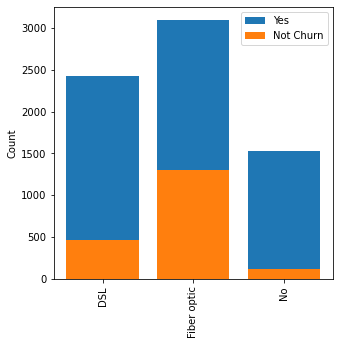

  InternetService  Churn_Yes  total       Avg
0             DSL        459   2421  0.189591
1     Fiber optic       1297   3096  0.418928
2              No        113   1526  0.074050


In [66]:
barplots(data,'InternetService','Churn_Yes')

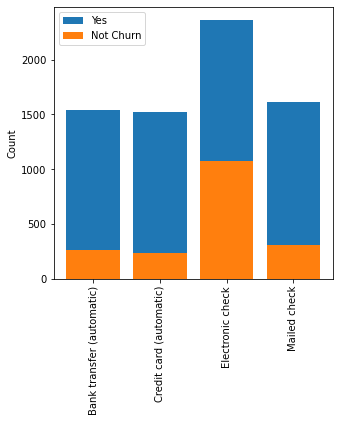

               PaymentMethod  Churn_Yes  total       Avg
0  Bank transfer (automatic)        258   1544  0.167098
1    Credit card (automatic)        232   1522  0.152431
2           Electronic check       1071   2365  0.452854
3               Mailed check        308   1612  0.191067


In [67]:
barplots(data,'PaymentMethod','Churn_Yes')

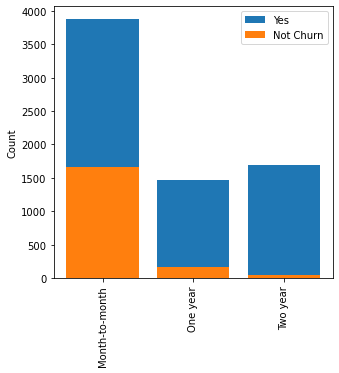

         Contract  Churn_Yes  total       Avg
0  Month-to-month       1655   3875  0.427097
1        One year        166   1473  0.112695
2        Two year         48   1695  0.028319


In [68]:
barplots(data,'Contract','Churn_Yes')

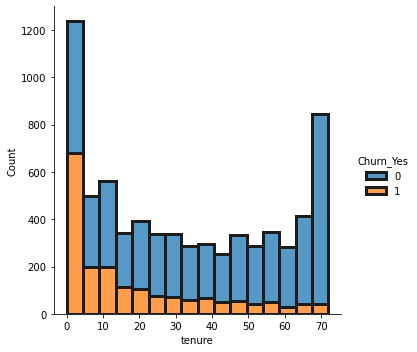

In [69]:
sns.displot(df,x='tenure',hue='Churn_Yes',edgecolor = "#1c1c1c", linewidth = 3,stat='count',multiple='stack')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

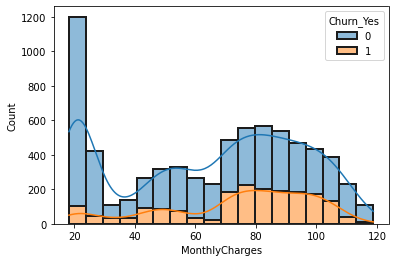

In [70]:

sns.histplot(df,x='MonthlyCharges',hue='Churn_Yes',kde=True,multiple='stack',element='bars',bins='auto',edgecolor = "#1c1c1c", linewidth = 2)

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

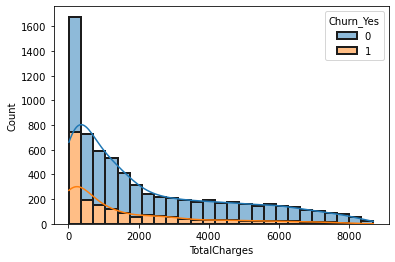

In [71]:
sns.histplot(df,x='TotalCharges', hue='Churn_Yes',kde=True,multiple='stack',element='bars',bins='auto',edgecolor = "#1c1c1c", linewidth = 2)

# Data Preparation

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [73]:
df=df.drop(['customerID'],axis=1)

In [74]:
missing_data = df.isnull().sum(axis=0).reset_index() 
missing_data.columns=['variable','missing values']
missing_data.sort_values('missing values',ascending=False).reset_index(drop = True)

,variable,missing values
0,TotalCharges,11
1,gender,0
2,SeniorCitizen,0
3,MonthlyCharges,0
4,PaymentMethod,0
5,PaperlessBilling,0
6,Contract,0
7,StreamingMovies,0
8,StreamingTV,0
9,TechSupport,0


In [75]:
df.TotalCharges.fillna(0,inplace=True)

Features Engineering

In [76]:
df2=df

In [77]:
catcol = [col for col in df2.columns if df2[col].dtype == "object"] #encoding data
le = LabelEncoder()
for col in catcol:
        df2[col] = le.fit_transform(df2[col])

In [78]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_Yes
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


Correlation

In [79]:
df3=df2.corr().Churn_Yes.sort_values(ascending=False).reset_index()
df3

,index,Churn_Yes
0,Churn_Yes,1.000000
1,MonthlyCharges,0.193356
2,PaperlessBilling,0.191825
3,SeniorCitizen,0.150889
4,PaymentMethod,0.107062
5,MultipleLines,0.038037
6,PhoneService,0.011942
7,gender,-0.008612
8,StreamingTV,-0.036581
9,StreamingMovies,-0.038492


Text(0.5, 1.0, '\nHeatmap correlation\n')

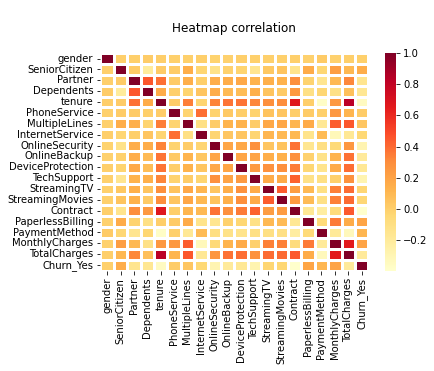

In [80]:
sns.heatmap(df2.corr(),cmap="YlOrRd", edgecolor = "#1c1c1c", linewidth = 3)
plt.title(f'\nHeatmap correlation\n')

Split

In [81]:
X=df2.drop(['Churn_Yes'],1)
y=df2[['Churn_Yes']]

Balancing

In [82]:
from imblearn.over_sampling import RandomOverSampler


oversample = RandomOverSampler(sampling_strategy=1)
X_over, y_over = oversample.fit_resample(X, y)

In [83]:
train_X,test_X,train_y,test_y = train_test_split(X_over,y_over,test_size=0.2,random_state=0)

In [84]:
test_X.shape,test_y.shape

((2070, 19), (2070, 1))

# Machine Learning Modelling

Decision Tree

In [85]:
dtr=DecisionTreeClassifier()

dtr.fit(train_X,train_y)

DecisionTreeClassifier()

<AxesSubplot:>

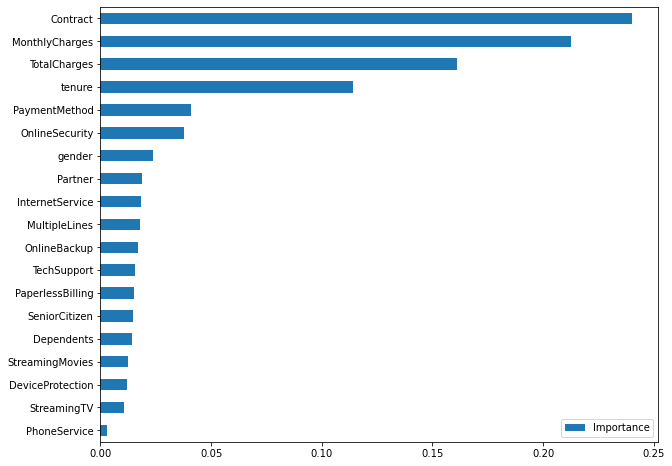

In [86]:
feat_importances = pd.DataFrame(dtr.feature_importances_, index=test_X.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=True, inplace=True)
feat_importances.plot(kind='barh',figsize=(10,8))


In [87]:
dtr_pred=dtr.predict(test_X)
dtr_conf=confusion_matrix(test_y,dtr_pred)
dtr_report=classification_report(test_y,dtr_pred)
dtr_acc=round(accuracy_score(test_y,dtr_pred)*100,ndigits=3)
dtr_rocauc=roc_auc_score(test_y, dtr_pred)
print(f"Confusion Matrix : \n\n{dtr_conf}")
print(f"\nClassification Report : \n\n{dtr_report}")
print(f"\nThe Accuracy of Decision Tree is {dtr_acc} %")
print(f'ROC AUC Score with Decision Tree: {dtr_rocauc}')

Confusion Matrix : 

[[794 239]
 [ 63 974]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.93      0.77      0.84      1033
           1       0.80      0.94      0.87      1037

    accuracy                           0.85      2070
   macro avg       0.86      0.85      0.85      2070
weighted avg       0.86      0.85      0.85      2070


The Accuracy of Decision Tree is 85.411 %
ROC AUC Score with Decision Tree: 0.8539414369210463


Random forest

In [88]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42) 
rfc.fit(train_X,train_y)


RandomForestClassifier(random_state=42)

In [89]:
rfc_pred = rfc.predict(test_X)
rfc_conf = confusion_matrix(test_y, rfc_pred)
rfc_report = classification_report(test_y, rfc_pred)
rfc_acc = round(accuracy_score(test_y, rfc_pred)*100, ndigits = 2)
rfc_rocauc=roc_auc_score(test_y, rfc_pred)
print(f"Confusion Matrix : \n\n{rfc_conf}")
print(f"\nClassification Report : \n\n{rfc_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rfc_acc} %")
print(f'ROC AUC score wiht Random Forest Classifier: {rfc_rocauc}')

Confusion Matrix : 

[[852 181]
 [ 50 987]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      1033
           1       0.85      0.95      0.90      1037

    accuracy                           0.89      2070
   macro avg       0.89      0.89      0.89      2070
weighted avg       0.89      0.89      0.89      2070


The Accuracy of Random Forest Classifier is 88.84 %
ROC AUC score wiht Random Forest Classifier: 0.8882830900439779


Logistic Regresion

In [90]:
lr=LogisticRegression()
lr.fit(train_X,train_y)

LogisticRegression()

In [91]:
lr_pred = lr.predict(test_X)
lr_conf = confusion_matrix(test_y, lr_pred)
lr_report = classification_report(test_y, lr_pred)
lr_acc = round(accuracy_score(test_y, lr_pred)*100, ndigits = 2)
lr_rocauc=roc_auc_score(test_y, lr_pred)
print(f"Confusion Matrix : \n\n{lr_conf}")
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regresion is {lr_acc} %")
print(f'ROC AUC score wiht Logistic Regresion: {lr_rocauc}')



Confusion Matrix : 

[[744 289]
 [211 826]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1033
           1       0.74      0.80      0.77      1037

    accuracy                           0.76      2070
   macro avg       0.76      0.76      0.76      2070
weighted avg       0.76      0.76      0.76      2070


The Accuracy of Logistic Regresion is 75.85 %
ROC AUC score wiht Logistic Regresion: 0.7583803902276001


Gradien Boost

In [92]:
gradien=GradientBoostingClassifier()

gradien.fit(train_X,train_y)

GradientBoostingClassifier()

In [93]:
gradien_pred=gradien.predict(test_X)
gradien_conf=confusion_matrix(test_y,gradien_pred)
gradien_report=classification_report(test_y,gradien_pred)
gradien_acc=round(accuracy_score(test_y,gradien_pred)*100,ndigits=3)
gradien_rocauc=roc_auc_score(test_y, gradien_pred)
print(f"Confusion Matrix : \n\n{gradien_conf}")
print(f"\nClassification Report : \n\n{gradien_report}")
print(f"\nThe Accuracy of Gradien Boost is {gradien_acc} %")
print(f'ROC AUC score wiht Gradien Boost: {gradien_rocauc}')

Confusion Matrix : 

[[749 284]
 [195 842]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1033
           1       0.75      0.81      0.78      1037

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070


The Accuracy of Gradien Boost is 76.86 %
ROC AUC score wiht Gradien Boost: 0.7685150869895195


SGD Classifier

In [94]:
sgd=SGDClassifier()

sgd.fit(train_X,train_y)

SGDClassifier()

In [95]:
sgd_pred=sgd.predict(test_X)
sgd_conf=confusion_matrix(test_y,sgd_pred)
sgd_report=classification_report(test_y,sgd_pred)
sgd_acc=round(accuracy_score(test_y,sgd_pred)*100,ndigits=3)
sgd_rocauc=roc_auc_score(test_y, sgd_pred)
print(f"Confusion Matrix : \n\n{sgd_conf}")
print(f"\nClassification Report : \n\n{sgd_report}")
print(f"\nThe Accuracy of SGD is {sgd_acc} %")
print(f'ROC AUC Score with SGD: {sgd_rocauc}')

Confusion Matrix : 

[[323 710]
 [ 56 981]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.85      0.31      0.46      1033
           1       0.58      0.95      0.72      1037

    accuracy                           0.63      2070
   macro avg       0.72      0.63      0.59      2070
weighted avg       0.72      0.63      0.59      2070


The Accuracy of SGD is 62.995 %
ROC AUC Score with SGD: 0.6293397907621303


GauusianNB

In [96]:
gnb=GaussianNB()

gnb.fit(train_X,train_y)


GaussianNB()

In [97]:
gnb_pred=gnb.predict(test_X)
gnb_conf=confusion_matrix(test_y,gnb_pred)
gnb_report=classification_report(test_y,gnb_pred)
gnb_acc=round(accuracy_score(test_y,gnb_pred)*100,ndigits=3)
gnb_rocauc=roc_auc_score(test_y, gnb_pred)
print(f"Confusion Matrix : \n\n{gnb_conf}")
print(f"\nClassification Report : \n\n{gnb_report}")
print(f"\nThe Accuracy of Gaussian is {gnb_acc} %")
print(f'ROC AUC Score with Gaussian Naive Bayes: {gnb_rocauc}',)

Confusion Matrix : 

[[716 317]
 [224 813]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.76      0.69      0.73      1033
           1       0.72      0.78      0.75      1037

    accuracy                           0.74      2070
   macro avg       0.74      0.74      0.74      2070
weighted avg       0.74      0.74      0.74      2070


The Accuracy of Gaussian is 73.865 %
ROC AUC Score with Gaussian Naive Bayes: 0.7385595502702056


XGBoost

In [98]:
xgboost=XGBClassifier(objective='binary:logistic',eval_metric = 'auc', n_jobs=-1)
xgboost.fit(train_X,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [99]:
xgboost_pred=xgboost.predict(test_X)
xgboost_conf=confusion_matrix(test_y,xgboost_pred)
xgboost_report=classification_report(test_y,xgboost_pred)
xgboost_acc=round(accuracy_score(test_y,xgboost_pred)*100,ndigits=3)
xgboost_rocauc=roc_auc_score(test_y, xgboost_pred)
print(f"Confusion Matrix : \n\n{xgboost_conf}")
print(f"\nClassification Report : \n\n{xgboost_report}")
print(f"\nThe Accuracy of XGB is {xgboost_acc} %")
print(f'ROC AUC Score with XGBOOST: {xgboost_rocauc}')


Confusion Matrix : 

[[798 235]
 [ 87 950]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1033
           1       0.80      0.92      0.86      1037

    accuracy                           0.84      2070
   macro avg       0.85      0.84      0.84      2070
weighted avg       0.85      0.84      0.84      2070


The Accuracy of XGB is 84.444 %
ROC AUC Score with XGBOOST: 0.8443057034916233


In [100]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(train_X,train_y)

KNeighborsClassifier()

In [101]:
knn_pred=knn.predict(test_X)
knn_conf=confusion_matrix(test_y,knn_pred)
knn_report=classification_report(test_y,knn_pred)
knn_acc=round(accuracy_score(test_y,knn_pred)*100,ndigits=3)
knn_rocauc=roc_auc_score(test_y, knn_pred)
print(f"Confusion Matrix : \n\n{knn_conf}")
print(f"\nClassification Report : \n\n{knn_report}")
print(f"\nThe Accuracy of KNN is {knn_acc} %")
print(f'ROC AUC Score with KNN: {knn_rocauc}')


Confusion Matrix : 

[[708 325]
 [194 843]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.78      0.69      0.73      1033
           1       0.72      0.81      0.76      1037

    accuracy                           0.75      2070
   macro avg       0.75      0.75      0.75      2070
weighted avg       0.75      0.75      0.75      2070


The Accuracy of KNN is 74.928 %
ROC AUC Score with KNN: 0.7491521357404308


In [102]:
from sklearn import svm

SVM=svm.SVC()

SVM.fit(train_X,train_y)

SVC()

In [103]:
SVM_pred=SVM.predict(test_X)
SVM_conf=confusion_matrix(test_y,SVM_pred)
SVM_report=classification_report(test_y,SVM_pred)
SVM_acc=round(accuracy_score(test_y,SVM_pred)*100,ndigits=3)
SVM_rocauc=roc_auc_score(test_y, SVM_pred)
print(f"Confusion Matrix : \n\n{SVM_conf}")
print(f"\nClassification Report : \n\n{SVM_report}")
print(f"\nThe Accuracy of SVM is {SVM_acc} %")
print(f'ROC AUC Score with SVM: {SVM_rocauc}')


Confusion Matrix : 

[[727 306]
 [413 624]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.64      0.70      0.67      1033
           1       0.67      0.60      0.63      1037

    accuracy                           0.65      2070
   macro avg       0.65      0.65      0.65      2070
weighted avg       0.65      0.65      0.65      2070


The Accuracy of SVM is 65.266 %
ROC AUC Score with SVM: 0.652755593850382


In [104]:
results = pd.DataFrame([["XGBoost Classifier", xgboost_acc, xgboost_rocauc],
                        ["Decision Tree Classifier", dtr_acc, dtr_rocauc], 
                        ["Gaussian naive bayes classifier", gnb_acc, gnb_rocauc],
                        ["Gradien Boost Classifier", gradien_acc, gradien_rocauc],
                        ["Random Forest Classifier", rfc_acc, rfc_rocauc],
                        ["Logistic Regression",lr_acc,lr_rocauc],
                        ["KNeighborsClassifier",knn_acc,knn_rocauc],
                        ["Support Vector Machine",SVM_acc,SVM_rocauc]],
                        columns = ["Models", "Testing Accuracy Score", "ROC AUC Score"])

results.sort_values(by=['Testing Accuracy Score'], ascending=False).style.background_gradient(cmap='YlOrRd')

,Models,Testing Accuracy Score,ROC AUC Score
4,Random Forest Classifier,88.840000,0.888283
1,Decision Tree Classifier,85.411000,0.853941
0,XGBoost Classifier,84.444000,0.844306
3,Gradien Boost Classifier,76.860000,0.768515
5,Logistic Regression,75.850000,0.758380
6,KNeighborsClassifier,74.928000,0.749152
2,Gaussian naive bayes classifier,73.865000,0.738560
7,Support Vector Machine,65.266000,0.652756
